<a href="https://colab.research.google.com/github/perses08/Sarcasm_Detect_-nlp-/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-24 06:30:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.217.13.80, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-11-24 06:30:38 (107 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import tensorflow as tf

In [3]:
with open('/tmp/sarcasm.json','r') as f:
  datastore = json.load(f)

In [4]:
sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [5]:
len(sentences)

26709

In [6]:
train_x = sentences[:20000]
train_y = labels[:20000]

In [7]:
test_x = sentences[20000:]
test_y = labels[20000:]

In [8]:
token = Tokenizer(num_words=10000,oov_token='<OOV>')
token.fit_on_texts(sentences)

In [24]:
word_index = token.word_index

In [9]:
training_sentences = token.texts_to_sequences(train_x)
test_sentences = token.texts_to_sequences(test_x)

In [10]:
padded_train = pad_sequences(training_sentences,maxlen=120,padding='post',truncating='post')
padded_test = pad_sequences(test_sentences,maxlen=120,padding='post',truncating='post')

In [11]:
import numpy as np
train_x = np.array(padded_train)
train_y = np.array(train_y)
test_x = np.array(padded_test)
test_y = np.array(test_y)

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000,32,input_length=120),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                122912    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 442,945
Trainable params: 442,945
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
history = model.fit(train_x,train_y,epochs=30,validation_data=(test_x,test_y),verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.4345 - accuracy: 0.7837 - val_loss: 0.3241 - val_accuracy: 0.8577
Epoch 2/30
625/625 - 3s - loss: 0.2042 - accuracy: 0.9176 - val_loss: 0.3204 - val_accuracy: 0.8650
Epoch 3/30
625/625 - 3s - loss: 0.1090 - accuracy: 0.9624 - val_loss: 0.3672 - val_accuracy: 0.8597
Epoch 4/30
625/625 - 3s - loss: 0.0486 - accuracy: 0.9864 - val_loss: 0.4378 - val_accuracy: 0.8566
Epoch 5/30
625/625 - 3s - loss: 0.0179 - accuracy: 0.9967 - val_loss: 0.5182 - val_accuracy: 0.8538
Epoch 6/30
625/625 - 3s - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.5964 - val_accuracy: 0.8514
Epoch 7/30
625/625 - 4s - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.6539 - val_accuracy: 0.8495
Epoch 8/30
625/625 - 4s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.6780 - val_accuracy: 0.8512
Epoch 9/30
625/625 - 4s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.7283 - val_accuracy: 0.8487
Epoch 10/30
625/625 - 3s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.7650 - val_accuracy: 0.8487

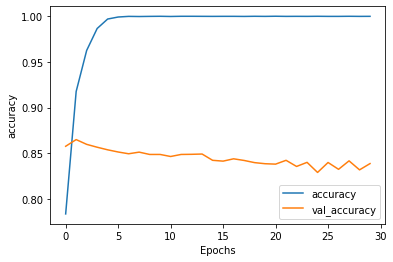

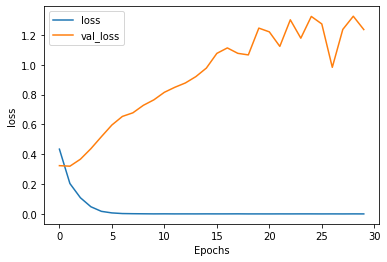

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [23]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = token.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=120, padding='post', truncating='post')
print(model.predict(padded))

[[9.9880195e-01]
 [2.2347408e-06]]


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')